In [1]:
import numpy as np
import time

In [2]:
import matplotlib.pyplot as plt
from pystem.stemsegmentation import segmentationSTEM

In [3]:
image = np.load('CuGB.npy')

([], <a list of 0 Text yticklabel objects>)

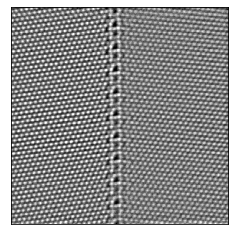

In [4]:
plt.imshow(image[:,:],cmap='gray')
plt.xticks([])
plt.yticks([])

In [5]:
step = 5

In [6]:
descriptor_name = 'local_correlation_map'
seg = segmentationSTEM( n_patterns=3,
                       window_x=20,window_y=20,
                       patch_x=20,patch_y=20,
                       stride=step,
                       descriptor_name=descriptor_name,
                       #method='direct',
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:   3.22[s]


In [7]:
seg._descriptors.shape

(189, 189, 81)

In [8]:
seg._descriptors.shape

(189, 189, 81)

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA()

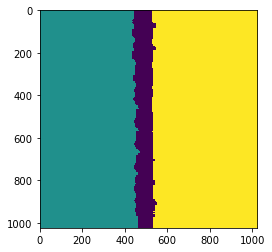

In [11]:
plt.imshow(labels)

In [12]:
descriptor_name = 'power_spectrum'
seg = segmentationSTEM( n_patterns=3,
                       window_x=20,window_y=20,
                       stride=step,
                       descriptor_name=descriptor_name,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:  16.64[s]


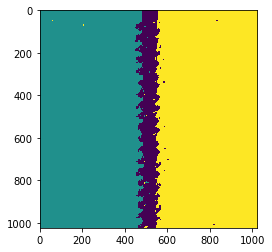

In [13]:
plt.imshow(labels)

In [14]:
descriptor_name = 'reflection_symmetry_maximum_pooling'
seg = segmentationSTEM(n_patterns=2,
                       window_x=20,window_y=20,
                       radius=20,
                       stride=step,
                       descriptor_name=descriptor_name,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:  73.06[s]


([], <a list of 0 Text yticklabel objects>)

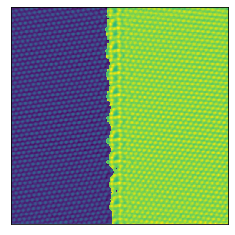

In [15]:
plt.imshow(0.5*image + labels)
plt.xticks([])
plt.yticks([])

In [16]:
descriptor_name = 'rotational_symmetry_maximum_pooling'
seg = segmentationSTEM( n_patterns=2,   #       rotational symmetry can only differentiate the grain boundary and the matrix
                       window_x=20,window_y=20,
                       radius=20,
                       stride=step,
                       descriptor_name=descriptor_name,
                       upsampling=True)
seg.paras['num_max']=20
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:  48.08[s]


([], <a list of 0 Text yticklabel objects>)

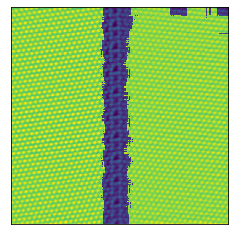

In [17]:
plt.imshow(0.5*image + labels)
plt.xticks([])
plt.yticks([])